In [ ]:
from google.colab import files

uploaded = files.upload()


Saving archive.zip to archive.zip


    Emotion  Mood_Intensity  Sleep_Quality  Feedback  Age  Gender Time_of_Day  \
0      Fear               3              4         1   33  Female   Afternoon   
1  Surprise               1              4         6   25  Female       Night   
2     Angry               8              9         6   39  Female       Night   
3       Sad               5              9         6   46  Female       Night   
4     Angry               4              6         8   28  Female       Night   

       Location Weather     Activity   Frequency  
0          Work   Snowy     Relaxing  183.375410  
1  Public Space   Snowy  Socializing  125.262876  
2  Public Space   Snowy     Relaxing  134.551979  
3          Work   Snowy     Relaxing  145.977091  
4  Public Space   Snowy      Working  116.163437  


Mean Squared Error: 24.48288938099594
R^2 Score: 0.8930804106890217


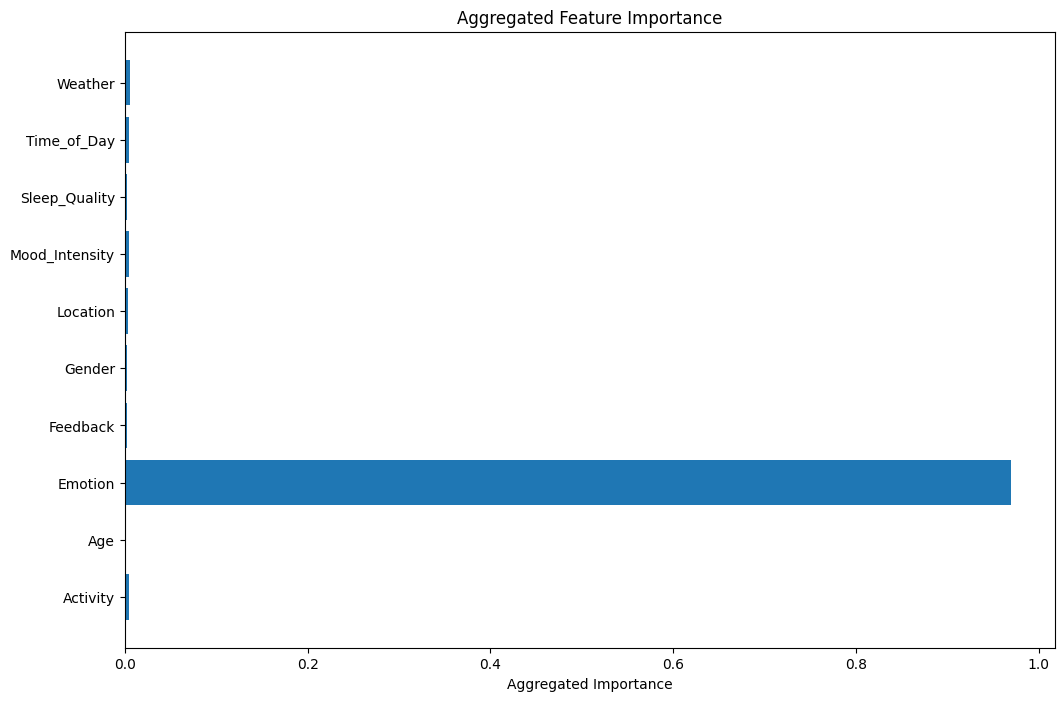

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best MSE: 20.162408080664143
Optimized Mean Squared Error: 21.019360441524928
Optimized R² Score: 0.9082060392866976


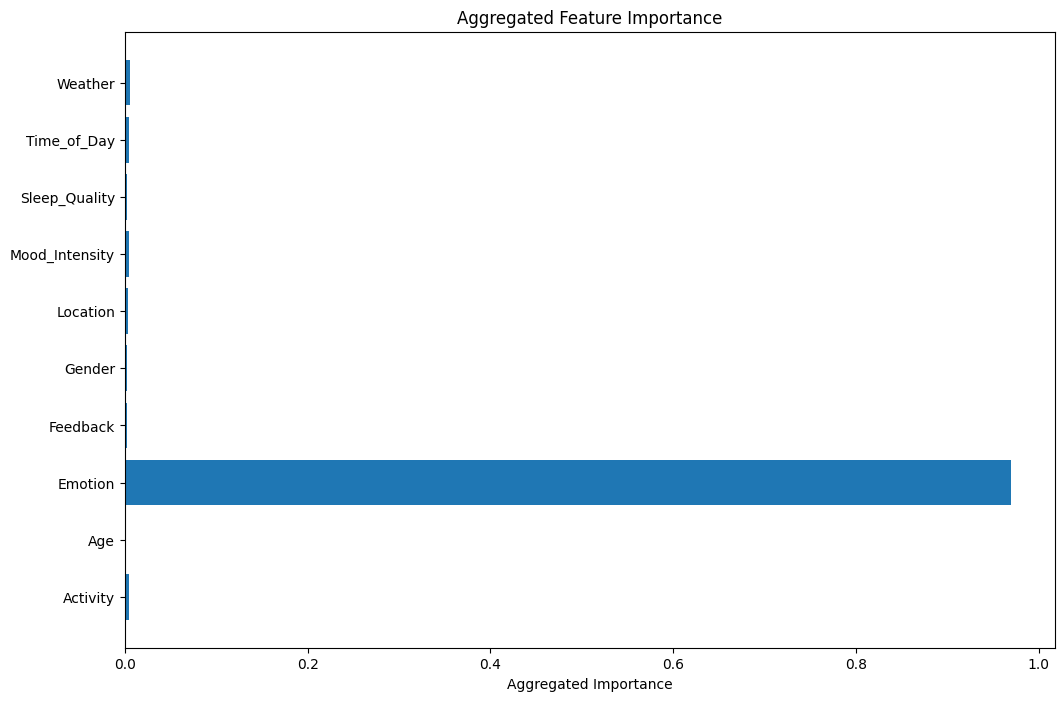

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/My Drive/FINAL/xgb_model.joblib']

    Emotion  Mood_Intensity  Sleep_Quality  Feedback  Age  Gender Time_of_Day  \
0      Fear               3              4         1   33  Female   Afternoon   
1  Surprise               1              4         6   25  Female       Night   
2     Angry               8              9         6   39  Female       Night   
3       Sad               5              9         6   46  Female       Night   
4     Angry               4              6         8   28  Female       Night   

       Location Weather     Activity   Frequency  
0          Work   Snowy     Relaxing  183.375410  
1  Public Space   Snowy  Socializing  125.262876  
2  Public Space   Snowy     Relaxing  134.551979  
3          Work   Snowy     Relaxing  145.977091  
4  Public Space   Snowy      Working  116.163437  


Mean Squared Error: 24.48288938099594
R^2 Score: 0.8930804106890217


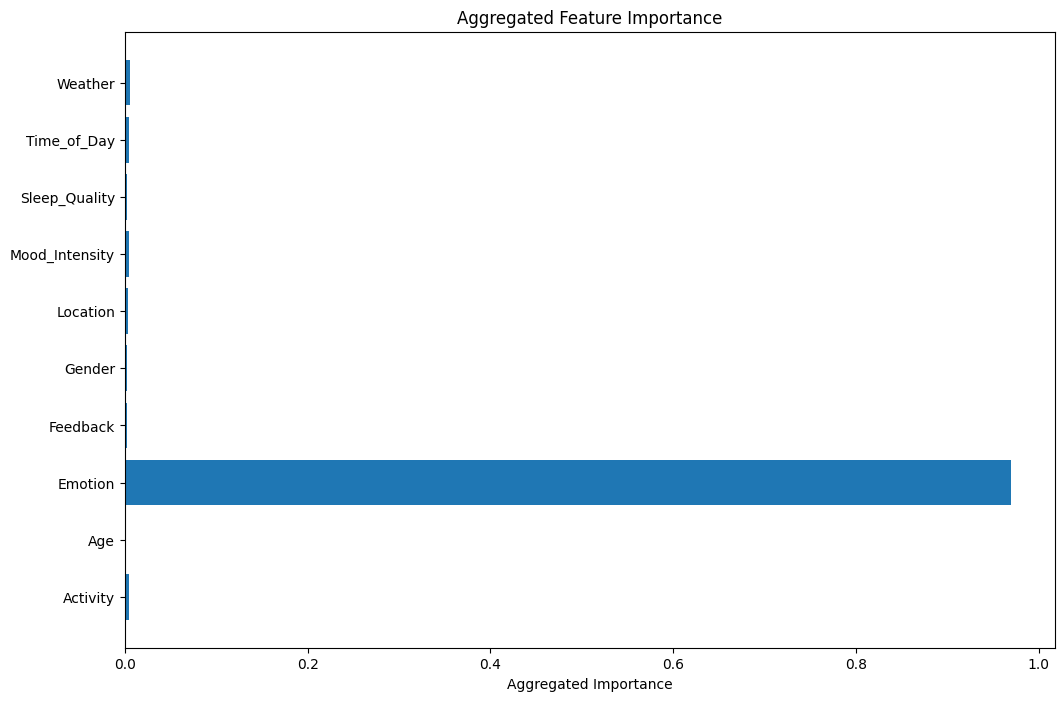

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best MSE: 20.162408080664143
Optimized Mean Squared Error: 21.019360441524928
Optimized R² Score: 0.9082060392866976


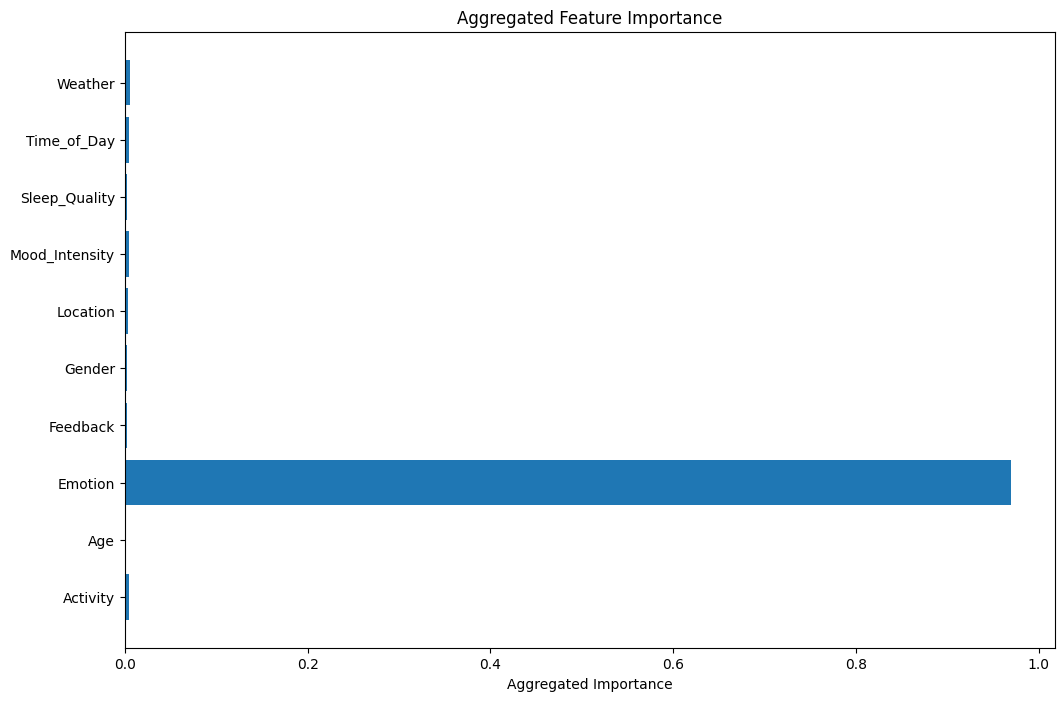

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/My Drive/FINAL/xgb_model.joblib']

    Emotion  Mood_Intensity  Sleep_Quality  Feedback  Age  Gender Time_of_Day  \
0      Fear               3              4         1   33  Female   Afternoon   
1  Surprise               1              4         6   25  Female       Night   
2     Angry               8              9         6   39  Female       Night   
3       Sad               5              9         6   46  Female       Night   
4     Angry               4              6         8   28  Female       Night   

       Location Weather     Activity   Frequency  
0          Work   Snowy     Relaxing  183.375410  
1  Public Space   Snowy  Socializing  125.262876  
2  Public Space   Snowy     Relaxing  134.551979  
3          Work   Snowy     Relaxing  145.977091  
4  Public Space   Snowy      Working  116.163437  


Mean Squared Error: 24.48288938099594
R^2 Score: 0.8930804106890217


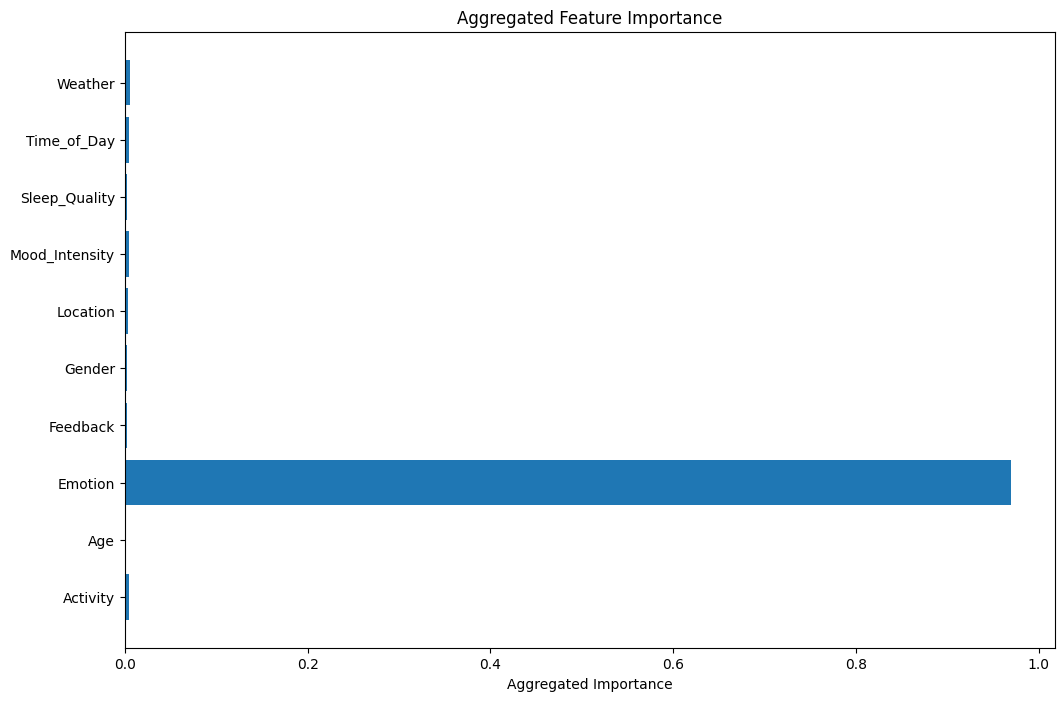

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best MSE: 20.162408080664143
Optimized Mean Squared Error: 21.019360441524928
Optimized R² Score: 0.9082060392866976


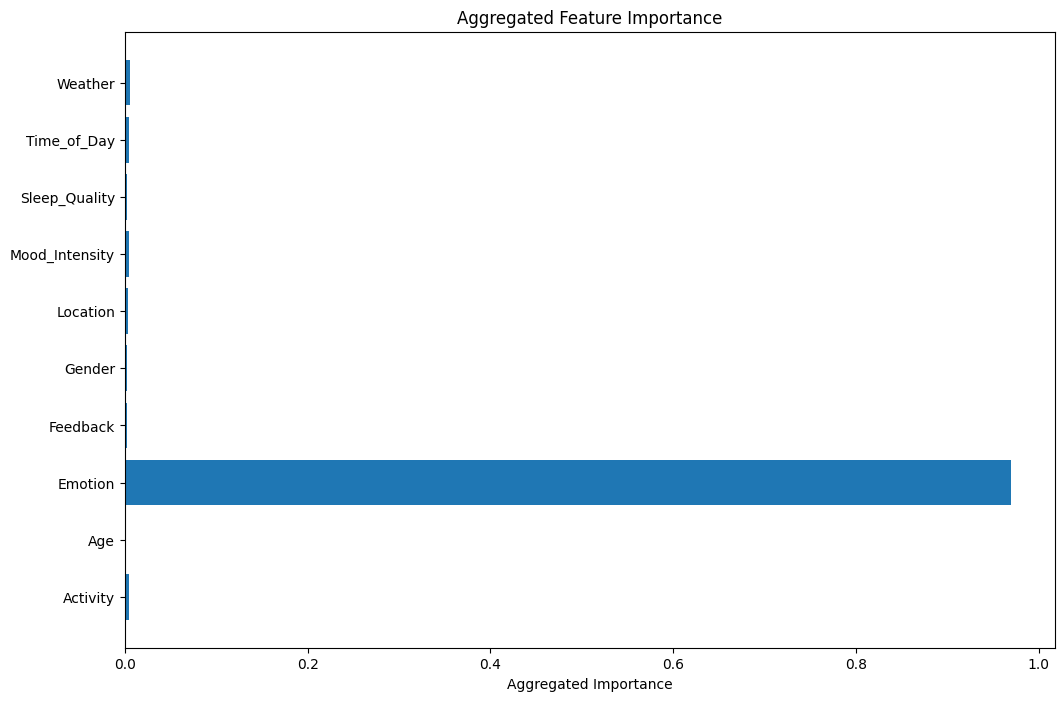

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/My Drive/FINAL/xgb_model.joblib']

In [ ]:
!pip install keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [ ]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

surprise completed
sad completed
fear completed
happy completed
angry completed
disgust completed
neutral completed


In [ ]:
print(train)

                                             image     label
0      images/train/surprise/Training_83796685.jpg  surprise
1      images/train/surprise/Training_21686077.jpg  surprise
2      images/train/surprise/Training_81793664.jpg  surprise
3      images/train/surprise/Training_55074716.jpg  surprise
4      images/train/surprise/Training_81340713.jpg  surprise
...                                            ...       ...
28704   images/train/neutral/Training_58556459.jpg   neutral
28705   images/train/neutral/Training_67019122.jpg   neutral
28706   images/train/neutral/Training_62401758.jpg   neutral
28707   images/train/neutral/Training_29604209.jpg   neutral
28708   images/train/neutral/Training_74913015.jpg   neutral

[28709 rows x 2 columns]


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

surprise completed
sad completed
fear completed
happy completed
angry completed
disgust completed
neutral completed


In [ ]:
print(test)
print(test['image'])

                                              image     label
0     images/test/surprise/PrivateTest_41512319.jpg  surprise
1      images/test/surprise/PublicTest_22313021.jpg  surprise
2     images/test/surprise/PrivateTest_97558106.jpg  surprise
3      images/test/surprise/PublicTest_17677007.jpg  surprise
4     images/test/surprise/PrivateTest_57200649.jpg  surprise
...                                             ...       ...
7173    images/test/neutral/PublicTest_51742224.jpg   neutral
7174    images/test/neutral/PublicTest_44866906.jpg   neutral
7175    images/test/neutral/PublicTest_69204976.jpg   neutral
7176    images/test/neutral/PublicTest_91265960.jpg   neutral
7177   images/test/neutral/PrivateTest_26804026.jpg   neutral

[7178 rows x 2 columns]
0       images/test/surprise/PrivateTest_41512319.jpg
1        images/test/surprise/PublicTest_22313021.jpg
2       images/test/surprise/PrivateTest_97558106.jpg
3        images/test/surprise/PublicTest_17677007.jpg
4       images/

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 500, validation_data = (x_test,y_test))

Epoch 1/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.2464 - loss: 1.8192 - val_accuracy: 0.2549 - val_loss: 1.8029
Epoch 2/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.2577 - loss: 1.7959 - val_accuracy: 0.3068 - val_loss: 1.7051
Epoch 3/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.3019 - loss: 1.7189 - val_accuracy: 0.3653 - val_loss: 1.6062
Epoch 4/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.3632 - loss: 1.6211 - val_accuracy: 0.4231 - val_loss: 1.4905
Epoch 5/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.4014 - loss: 1.5315 - val_accuracy: 0.4668 - val_loss: 1.3894
Epoch 6/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.4284 - loss: 1.4675 - val_accuracy: 0.4854 - val_loss: 1.3405
Epoch 7/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.4537 - loss: 1.4123 - val_accuracy: 0.5025 - val_loss: 1.2918
Epoch 8/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.4694 - loss: 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the model in native Keras format
model.save('/content/drive/MyDrive/FINAL/Face_Emotion.keras')  # Use .keras extension

In [ ]:
from keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/FINAL/Face_Emotion.keras')  # Use the .keras file

In [ ]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [ ]:
image = '/content/images/train/sad/Training_10022789.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
model prediction is  sad


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
model prediction is  sad


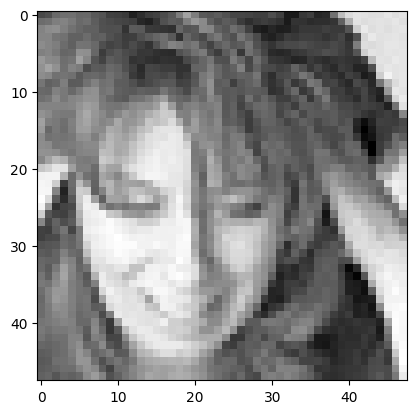

In [ ]:
image = '/content/images/train/sad/Training_10022789.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
model prediction is  surprise


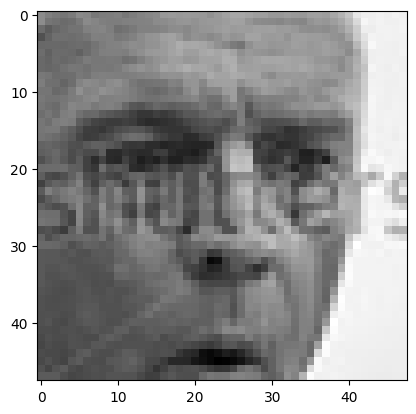

In [ ]:
image = '/content/images/train/surprise/Training_10013223.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
from keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/FINAL/Face_Emotion.keras')  # Use the .keras file

In [ ]:
from keras.models import load_model

# Assuming your model is called 'model'
model.save('/content/drive/MyDrive/FINAL/Face_Emotion.h5')  # Save weights
model_json = model.to_json()  # Save model architecture to JSON file
with open("facialemotionmodel.json", "w") as json_file:
    json_file.write(model_json)  # Save the JSON to a file


In [ ]:
from keras.models import model_from_json

# Assuming `model` is your trained Keras model
# Save model architecture to JSON
model_json = model.to_json()
with open("facialemotionmodel.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
# Save model weights
model.save_weights("facialemotionmodel.weights.h5")  # Use .weights.h5 extension

In [ ]:
import shutil

# Assuming you have already saved the JSON and weights in your current directory
shutil.copy("facialemotionmodel.json", "/content/drive/My Drive/FINAL/")  # Change path as needed
shutil.copy("facialemotionmodel.weights.h5", "/content/drive/My Drive/FINAL/")    # Change path as needed

'/content/drive/My Drive/FINAL/facialemotionmodel.weights.h5'